In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option('display.max_colwidth', None)
pd.set_option("display.max_rows", None)

In [2]:
df = pd.read_csv('Ukraine_tweetys.txt')

In [3]:
df = df.drop_duplicates()

In [4]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Datetime,Tweet Id,Text,Username,location,reply count,retweet count,like count,language,Twitter Access Point,Follower Count,Friends Count,verified
0,0,0,2022-03-14 23:59:59+00:00,1503521353869438976,"@GicAriana The writing on her sign was mostly in Russian. We understand your frustration and anger, but please don't dismiss how important this single act could be in changing the situation for Ukraine. A single breath... can bring down a house of cards.",xsryder,"Hamilton City, New Zealand",2,3,67,en,Twitter for Android,40,153,False
1,1,1,2022-03-14 23:59:59+00:00,1503521353558749184,"@blakandblack We scream at Putin for using the bullshit lie that he's there to save the people of Ukraine when that's exactly what we did in every war since WWII. Blind hypocrisy.\n\nYelling ""oi, prick, that's our gig"" would have more authenticity.",DArtagnan71,"Perth, WA",1,1,2,en,Twitter for Android,379,548,False
2,2,2,2022-03-14 23:59:58+00:00,1503521350023004161,"@WayneDupreeShow Really? Those tax breaks for the rich, the pandemic, the ineffectual China deal, handing Syria over to Russia, Ukraine, yes he did a lot. The big lie, the insurrection.",momotaro78sg,NaN,0,0,0,en,Twitter Web App,2,5,False
3,3,3,2022-03-14 23:59:58+00:00,1503521349456707584,"Wha matters is identity, self-identity. I imagine there are far fewer people in Ukraine willing to self-identify as Russian today. Those that did before are today probably ashamed of any association with Russia, international pariah. https://t.co/5jxLAFZNIB",lingosteve,West Vancouver,0,1,12,en,Twitter Web App,15750,457,False
4,4,4,2022-03-14 23:59:58+00:00,1503521347942719489,@itsprincessrati Ba go ise Ukraine 💔😭😭,myltshepo,the gutter,1,0,0,en,Twitter for Android,1566,4299,False


In [5]:
# Extract languages used in the dataset
df_lan = df.groupby('language').count()
df_lan.to_excel('ukrainelanguagedf.xlsx')

In [6]:
# Find tweets in English only
df_en = df[df['language']=='en']

In [8]:
# Remove unnecessary columns
df_en_clean = df_en.drop(columns = ['Tweet Id','Unnamed: 0','Unnamed: 0.1','verified'], axis  = 1)

In [11]:
import matplotlib.pyplot as plt
usename_df = pd.DataFrame()
username_df = df_en_clean['Username'].value_counts().rename_axis('username').reset_index(name='counts')
username_df.head()

,username,counts
0,StopVladdyDaddy,2422
1,TheAnswerYes,853
2,AndyVermaut,698
3,BwcDeals,620
4,usasharenews,456


([<matplotlib.axis.XTick at 0x7f99935da640>,
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10')])

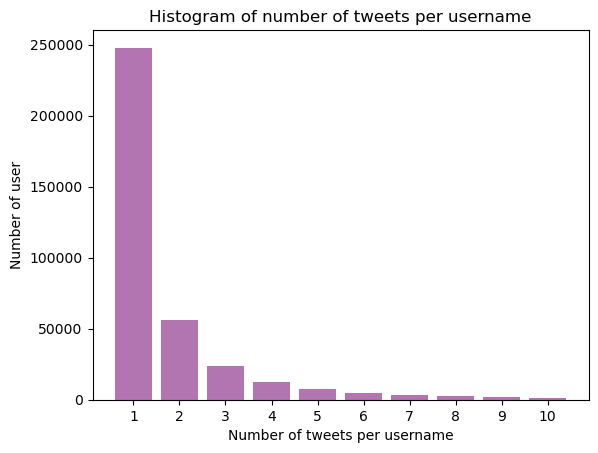

In [13]:
import numpy as np
height = [247891,  56181,  23446,  12590,   7374,   4994,   3330,
          2474,   1886,   1410]
bars = ('1', '2', '3', '4', '5','6','7','8','9',10)
x_pos = np.arange(len(bars))
 
# Create bars and choose color
plt.bar(x_pos, height, color = (0.5,0.1,0.5,0.6))
 
# Add title and axis names
plt.title('Histogram of number of tweets per username')
plt.xlabel('Number of tweets per username')
plt.ylabel('Number of user')
 
# Create names on the x axis
plt.xticks(x_pos, bars)

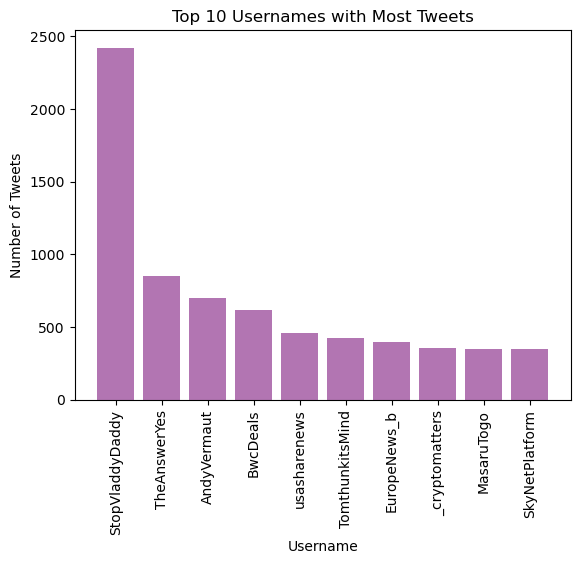

In [14]:
usernames = username_df['username'].head(10)
tweet_counts = username_df['counts'].head(10)

x_pos = np.arange(len(usernames))
plt.bar(x_pos, tweet_counts, align='center', color = (0.5,0.1,0.5,0.6))
plt.xticks(x_pos, usernames, rotation=90)
plt.xlabel('Username')
plt.ylabel('Number of Tweets')
plt.title('Top 10 Usernames with Most Tweets')

plt.show()

In [19]:
df_en_clean.to_csv('cleaned_tweets.csv')

## Tweets from Russia location

In [20]:
import numpy as np
position = 0
positions = []
for location in df_en_clean.location:
    if type(location) != float:
        location = location.lower().split()
        if 'russia' in location and 'us' not in location and 'not' not in location and 'but' not in location:
            positions.append(position)
    else:
        pass
    position = position + 1

In [21]:
df_en_clean.iloc[positions[1],3]

'Moscow, Russia'

In [22]:
df_russia_en = pd.DataFrame()
for position in positions:
    entry = df_en_clean.iloc[position,:]
    #print(row)
    df_russia_en= pd.concat([df_russia_en,entry],axis = 1)
    #row_2 = df.loc[1].copy()  

In [23]:
df_russia_en = df_russia_en.transpose()

In [26]:
df_russia_en.to_csv('Russia_loc.csv')

## Tweets from Ukraine location

In [27]:
import numpy as np
position = 0
positions = []
for location in df_en_clean.location:
    if type(location) != float:
        location = location.lower().split()
        if ('ukraine' in location and 'taxpayer' not in location and\
            'and' not in location and 'in' not in location\
            and 'us' not in location and 'stand' not in location\
            and 'is' not in location and 'free' not in location\
           and 'earth' not in location and 'uk' not in location\
            and 'with' not in location and 'germany' not in location\
           and 'ireland' not in location and 'to' not in location\
           and 'support' not in location and 'ca' not in location\
           and 'ny' not in location and 'all' not in location\
           and 'or' not in location and 'denmark' not in location):
            positions.append(position)
    else:
        pass
    position = position + 1
print(df_en_clean.iloc[positions[0],:])

Datetime                                              2022-03-14 23:59:46+00:00
Text                    @franch_laura Thank you for supporting our Ukraine 💙💛🙏🏻
Username                                                           litsarkisian
location                                                                Ukraine
reply count                                                                   1
retweet count                                                                 0
like count                                                                    0
language                                                                     en
Twitter Access Point                                         Twitter for iPhone
Follower Count                                                             1243
 Friends Count                                                               25
Name: 52, dtype: object


In [28]:
df_ukraine_en = pd.DataFrame()
for position in positions:
    entry = df_en_clean.iloc[position,:]
    #print(entry.location)
    df_ukraine_en = pd.concat([df_ukraine_en,entry],axis = 1)

In [29]:
df_ukraine_en = df_ukraine_en.transpose()

In [30]:
df_ukraine_en.shape

(7087, 11)

In [31]:
df_ukraine_en.head()

,Datetime,Text,Username,location,reply count,retweet count,like count,language,Twitter Access Point,Follower Count,Friends Count
52,2022-03-14 23:59:46+00:00,@franch_laura Thank you for supporting our Ukraine 💙💛🙏🏻,litsarkisian,Ukraine,1,0,0,en,Twitter for iPhone,1243,25
236,2022-03-14 23:59:04+00:00,"To all friends of Ukraine, in all countries: go to protests! Please claim your government to close the sky, they can't do this without the request of their people! Democracy works like that!\n\n#UkraineWar #CloseTheSky #UkraineRussiaWar #StopPutin #Ukrainian https://t.co/bR2nSQUi7e",goldraga,"Kharkiv, Ukraine",0,1,2,en,Twitter Web App,6,18
619,2022-03-14 23:57:26+00:00,Ukrainian BM-21 Grad MLRS firing on Russian positions. https://t.co/oBiA5XtVlh via @YouTube Ukraine War today Russia #Kyiv #Mauripol #DonbassUkraine @Ukrainewartoday,Ukrainewartoday,Ukraine,0,0,0,en,Twitter Web App,278,159
693,2022-03-14 23:57:09+00:00,@AndrzejDuda @ZelenskyyUa We need fighter jets and anti-aircraft systems. Don't let Ukraine lose this war.,tethys1100,Ukraine,0,0,0,en,Twitter for Android,115,240
704,2022-03-14 23:57:06+00:00,Ambushed Russian Military Convoy! https://t.co/5JIn2mhqyt via @YouTube Ukraine War today Russia #Ukrajina #rat #Ukrajna @Ukrainewartoday,Ukrainewartoday,Ukraine,0,0,1,en,Twitter Web App,278,159


In [33]:
df_ukraine_en.to_csv('Ukraine_loc.csv')

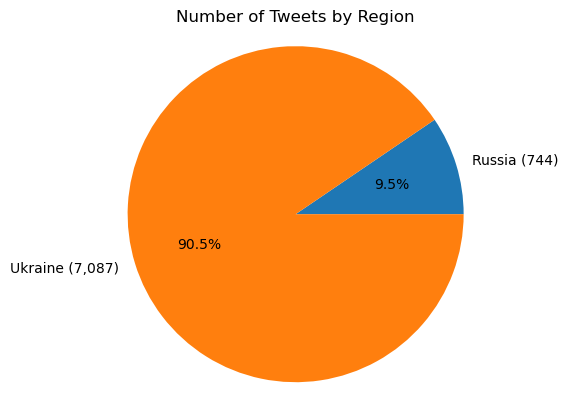

In [34]:
import matplotlib.pyplot as plt

tweet_counts = [len(df_russia_en), len(df_ukraine_en)]
labels = ['Russia', 'Ukraine']

# Add tweet counts to labels
for i in range(len(labels)):
    labels[i] += ' ({:,d})'.format(tweet_counts[i])

plt.pie(tweet_counts, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Number of Tweets by Region')

plt.show()

## High impact tweets (like, retweet and reply > 1)

In [38]:
df_en_highimpact = df_en_clean[df_en_clean['like count'] > 1]
df_en_highimpact = df_en_highimpact[df_en_highimpact['retweet count']>1]
df_en_highimpact = df_en_highimpact[df_en_highimpact['reply count']>1]
df_en_highimpact.shape

(36279, 11)

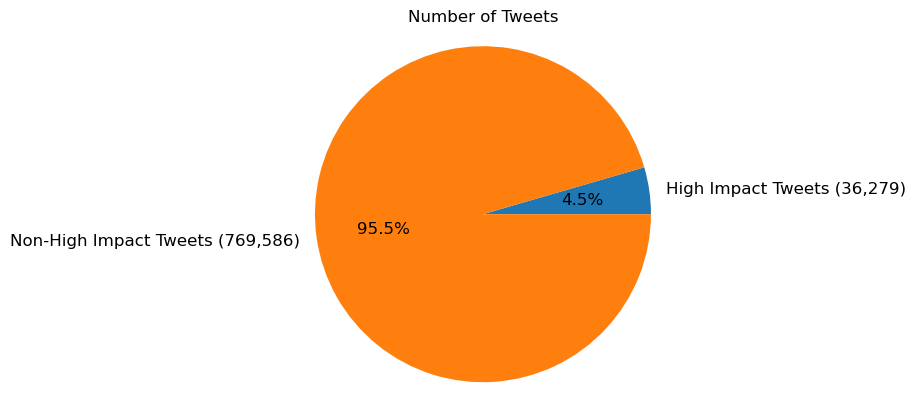

In [39]:
import matplotlib.pyplot as plt

high_impact_tweets_count = len(df_en_highimpact)
non_high_impact_tweets_count = len(df_en_clean)-len(df_en_highimpact)

tweet_counts = [high_impact_tweets_count, non_high_impact_tweets_count]
labels = ['High Impact Tweets', 'Non-High Impact Tweets']

# Add tweet counts to labels
for i in range(len(labels)):
    labels[i] += ' ({:,d})'.format(tweet_counts[i])

plt.pie(tweet_counts, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 12})
plt.axis('equal')
plt.title('Number of Tweets')

plt.show()

In [40]:
df_en_highimpact.to_csv('highimpact.csv')

## Topic modeling for high impact tweets 

In [41]:
import gensim
#from gensim.utils import simple_preprocess
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
import spacy
import gensim.corpora as corpora

In [42]:
# clean_text takes in a pd.Series and removes special characters, stopwords, etc
def clean_text_nltk(pd_column):
    stop_words = list(set(stopwords.words('english')))  #use nltk stopwords
    clean = []
    for i in pd_column:
        i = i.lower()  #turn to lower case
        #print(i)
    
        #preprocess to split the words
        #re.split() has problem with '-' if no space between words, so first do i.split('-')
        i = i.split('-')
        i = ' '.join(i)
        i = i.split()
        #print(i)
    
        split_sent2 = []
        
        #remove stopwords and special characters
        for word in i:
            
            new_word = []
            if word not in stop_words and word[0]!='@' and word[0:4] != 'http' and word[0]!='#':
            #check each word to remove stop words, @username, website, hash-tag

                for letter in word:  #check each letter in word to remove special characters
                    if letter.isalpha(): #or letter.isdigit():
                        new_word.append(letter)
                    else:
                        pass
                word2 = ''.join(new_word)
                #print(word2)
                
                if word2 in stop_words or len(word2) < 3: #check stopwords again
                    pass
                else:
                    split_sent2.append(word2)
            else:
                pass
            
        #print(split_sent2)
        
        sent2 = ' '.join(split_sent2)
        clean.append(sent2)
    
    #print(clean[0:10])
    return(clean)

In [43]:
test = clean_text_nltk(df_en_highimpact['Text'])

In [44]:
test[0:5]

['writing sign mostly russian understand frustration anger please dismiss important single act could changing situation ukraine single breath bring house cards',
 'question hosting ukraine refugees government pay month whats catch',
 'rule wednesday case russia ukraine accusations genocide amid ongoing russian invasion ukraine',
 'ending ethanol mandates boost worlds food supply help tackle impending global humanitarian crisis caused putins invasion ukraine',
 'ive shocked whats happening ukraine bit paralyzed past week still cant believe heres attempt help bit mint later proceeds donated']

In [45]:
# Tokenization, input is pd.Series with full sentences
from nltk.tokenize import sent_tokenize, word_tokenize

def nltk_tokenizer(pd_column):
    tokenized = []
    for i in pd_column:
        word_tokens = word_tokenize(i)
        tokenized.append(word_tokens)
    return tokenized

In [46]:
df_tokenized = pd.Series(nltk_tokenizer(test))
df_tokenized.head()

0    [writing, sign, mostly, russian, understand, frustration, anger, please, dismiss, important, single, act, could, changing, situation, ukraine, single, breath, bring, house, cards]
1                                                                                                           [question, hosting, ukraine, refugees, government, pay, month, whats, catch]
2                                                                             [rule, wednesday, case, russia, ukraine, accusations, genocide, amid, ongoing, russian, invasion, ukraine]
3                                     [ending, ethanol, mandates, boost, worlds, food, supply, help, tackle, impending, global, humanitarian, crisis, caused, putins, invasion, ukraine]
4                                 [ive, shocked, whats, happening, ukraine, bit, paralyzed, past, week, still, cant, believe, heres, attempt, help, bit, mint, later, proceeds, donated]
dtype: object

In [47]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(df_tokenized, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[df_tokenized], threshold=100)
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)
# See trigram example
print(trigram_mod[bigram_mod[df_tokenized[0]]])

['writing', 'sign', 'mostly', 'russian', 'understand', 'frustration', 'anger', 'please', 'dismiss', 'important', 'single', 'act', 'could', 'changing', 'situation', 'ukraine', 'single', 'breath', 'bring', 'house', 'cards']


In [48]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [49]:
data_words_bigrams = make_bigrams(df_tokenized)
print(data_words_bigrams[0:5])

[['writing', 'sign', 'mostly', 'russian', 'understand', 'frustration', 'anger', 'please', 'dismiss', 'important', 'single', 'act', 'could', 'changing', 'situation', 'ukraine', 'single', 'breath', 'bring', 'house', 'cards'], ['question', 'hosting', 'ukraine', 'refugees', 'government', 'pay', 'month', 'whats', 'catch'], ['rule', 'wednesday', 'case', 'russia', 'ukraine', 'accusations', 'genocide', 'amid', 'ongoing', 'russian', 'invasion', 'ukraine'], ['ending', 'ethanol', 'mandates', 'boost', 'worlds', 'food', 'supply', 'help', 'tackle', 'impending', 'global', 'humanitarian', 'crisis', 'caused', 'putins', 'invasion', 'ukraine'], ['ive', 'shocked', 'whats_happening', 'ukraine', 'bit', 'paralyzed', 'past', 'week', 'still', 'cant', 'believe', 'heres', 'attempt', 'help', 'bit', 'mint', 'later', 'proceeds_donated']]


In [50]:
import spacy
nlp = spacy.load('en_core_web_sm')
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
#print(data_lemmatized)

/Users/yiruiguo/opt/anaconda3/lib/python3.9/site-packages/spacy/util.py:877: UserWarning: [W095] Model 'en_core_web_sm' (3.4.1) was trained with spaCy v3.4 and may not be 100% compatible with the current version (3.5.0). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [51]:
# Create Dictionary 
id2word = corpora.Dictionary(data_lemmatized)  
# Create Corpus 
texts = data_lemmatized
# Term Document Frequency 
corpus = [id2word.doc2bow(text) for text in texts]  
# View 
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 2), (14, 1), (15, 1), (16, 1), (17, 1)]]


In [52]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100)

In [53]:
from pprint import pprint
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.032*"ukraine" + 0.025*"russian" + 0.019*"kill" + 0.017*"ukrainian" + '
  '0.012*"war" + 0.011*"people" + 0.010*"today" + 0.009*"soldier" + '
  '0.008*"civilian" + 0.007*"say"'),
 (1,
  '0.042*"ukraine" + 0.030*"russian" + 0.022*"military" + 0.020*"say" + '
  '0.018*"invasion" + 0.012*"weapon" + 0.010*"war" + 0.007*"aid" + '
  '0.007*"official" + 0.007*"attack"'),
 (2,
  '0.032*"ukraine" + 0.012*"people" + 0.012*"ukrainian" + 0.012*"help" + '
  '0.010*"get" + 0.009*"world" + 0.009*"talk" + 0.009*"refugee" + '
  '0.008*"peace" + 0.008*"war"'),
 (3,
  '0.025*"ukraine" + 0.013*"russian" + 0.010*"war" + 0.008*"give" + '
  '0.008*"well" + 0.008*"send" + 0.007*"s" + 0.007*"people" + 0.007*"still" + '
  '0.006*"say"'),
 (4,
  '0.034*"ukraine" + 0.017*"war" + 0.010*"amp" + 0.010*"people" + '
  '0.009*"country" + 0.008*"make" + 0.007*"support" + 0.007*"invasion" + '
  '0.007*"know" + 0.006*"go"')]


In [54]:
lda_model2 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100)

In [56]:
lda_model3 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=7, 
                                           random_state=100)

In [61]:
lemmatized_tweets = []
for ls in data_lemmatized:
    tweet = ' '.join(ls)
    lemmatized_tweets.append(tweet)

lemmatized_tweets[0:5]

['write sign mostly russian understand frustration anger dismiss important single act change situation ukraine single breath bring house card',
 'question host ukraine refugee government pay month s catch',
 'rule case accusation genocide ongoing russian invasion ukraine',
 'end ethanol mandate boost world food supply help tackle impend global humanitarian crisis cause putin invasion ukraine',
 'shock whats_happene ukraine bit paralyze week still believe here attempt help bit mint later proceeds_donate']

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = tfidf.fit_transform(lemmatized_tweets)

In [63]:
from sklearn.decomposition import NMF
nmf_model = NMF(n_components=5,random_state=42) #choosing 5 topics
nmf_model.fit(dtm)
tfidf.get_feature_names_out()[2400]

/Users/yiruiguo/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


'damaging'

In [64]:
topic_lists = []
for index,topic in enumerate(nmf_model.components_):
    print(f'THE TOP 20 WORDS FOR TOPIC #{index}')
    topic_list=[tfidf.get_feature_names_out()[i] for i in topic.argsort()[-20:]]
    print([tfidf.get_feature_names_out()[i] for i in topic.argsort()[-20:]])
    topic_lists.append(topic_list)
    print('\n')

THE TOP 20 WORDS FOR TOPIC #0
['situation', 'pray', 'challenge', 'glory', 'vote', 'military', 'refugee', 'russia', 'weapon', 'send', 'russias', 'invade', 'fight', 'assistance', 'help', 'aid', 'support', 'stand', 'invasion', 'ukraine']


THE TOP 20 WORDS FOR TOPIC #1
['video', 'day', 'use', 'tank', 'target', 'army', 'report', 'capture', 'destroy', 'strike', 'city', 'missile', 'soldier', 'troop', 'attack', 'military', 'ukrainian', 'force', 'invasion', 'russian']


THE TOP 20 WORDS FOR TOPIC #2
['time', 'day', 'come', 'end', 'refugee', 'fight', 'know', 'make', 'ukrainian', 'want', 'need', 'think', 'country', 'stop', 'world', 'amp', 'support', 'help', 'people', 'war']


THE TOP 20 WORDS FOR TOPIC #3
['country', 'report', 'western', 'break', 'strike', 'base', 'help', 'economic', 'attack', 'ask', 'trump', 'invade', 'equipment', 'weapon', 'assistance', 'talk', 'aid', 'official', 'military', 'say']


THE TOP 20 WORDS FOR TOPIC #4
['american', 'kyiv', 'brent_renaud', 'today', 'police', 'journal

In [65]:
topic_list1 = topic_lists[0]
topic_list2 = topic_lists[1]
topic_list3 = topic_lists[2]
topic_list4 = topic_lists[3]
topic_list5 = topic_lists[4]

In [66]:
set(topic_list1)&set(topic_list2)&set(topic_list3)&set(topic_list4)&set(topic_list5)

set()

In [67]:
topic_results = nmf_model.transform(dtm)
df_en_highimpact['Topic'] = topic_results.argmax(axis=1)

In [69]:
mytopic_dict = {0:'War cause',1:'Millitary progress',2:'Refugee and human rights',
                3:'Economic impact of the war',4:'News and journalism in war'}
df_en_highimpact['Topic Label'] = df_en_highimpact['Topic'].map(mytopic_dict)

In [71]:
df_en_highimpact['Topic'].value_counts()

2    17374
0     6610
1     6538
3     3701
4     2056
Name: Topic, dtype: int64

In [72]:
df_en_highimpact.to_csv('highimpact_nmf.csv')

## Sentiment analysis for high impact tweets

In [73]:
# Import SentimentIntensityAnalyzer and create an sid object
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

In [74]:
def sentiment_rating(string):
    sid_dict = sid.polarity_scores(string)
    if sid_dict['compound']>= 0.33:
        return ('Positive')
    elif sid_dict['compound']<= -0.33:
        return ('Negative')
    elif sid_dict['compound'] > -0.33 and sid_dict['compound'] < 0.33:
        return('Neutral')
    else:
        return('Score out of range')

sentiment_nltk = []
for tweet in df_en_highimpact['Text']:
    sid_dict = sentiment_rating(tweet)
    sentiment_nltk.append(sid_dict)

df_en_highimpact['sentiment_nltk'] = sentiment_nltk
#df_en_highimpact['sentiment_rating'] = sentimen

In [75]:
df_en_highimpact['sentiment_nltk'].value_counts()

Negative    15210
Neutral     12316
Positive     8753
Name: sentiment_nltk, dtype: int64

## Sentiment analysis for Russia location tweets

In [78]:
def sentiment_rating(string):
    sid_dict = sid.polarity_scores(string)
    if sid_dict['compound']>= 0.33:
        return ('Positive')
    elif sid_dict['compound']<= -0.33:
        return ('Negative')
    elif sid_dict['compound'] > -0.33 and sid_dict['compound'] < 0.33:
        return('Neutral')
    else:
        return('Score out of range')
    
sentiment_nltk = []
for tweet in df_russia_en['Text']:
    sid_dict = sentiment_rating(tweet)
    sentiment_nltk.append(sid_dict)


df_russia_en['sentiment_nltk'] = sentiment_nltk

In [79]:
df_russia_en.sentiment_nltk.value_counts()

Negative    337
Neutral     249
Positive    158
Name: sentiment_nltk, dtype: int64

In [80]:
sentiment_nltk = []
for tweet in df_russia_en['Text']:
    sid_dict = sentiment_rating(tweet)
    sentiment_nltk.append(sid_dict)

df_russia_en['sentiment_rating'] = sentiment_nltk

In [81]:
df_russia_en.sentiment_rating.value_counts()

Negative    337
Neutral     249
Positive    158
Name: sentiment_rating, dtype: int64

## Sentiment analysis for Ukraine location tweets

In [85]:
def sentiment_rating(string):
    sid_dict = sid.polarity_scores(string)
    if sid_dict['compound']>= 0.33:
        return ('Positive')
    elif sid_dict['compound']<= -0.33:
        return ('Negative')
    elif sid_dict['compound'] > -0.33 and sid_dict['compound'] < 0.33:
        return('Neutral')
    else:
        return('Score out of range')
    
sentiment_nltk = []
for tweet in df_ukraine_en['Text']:
    sid_dict = sentiment_rating(tweet)
    sentiment_nltk.append(sid_dict)


df_ukraine_en['sentiment_nltk'] = sentiment_nltk

In [86]:
df_ukraine_en.sentiment_nltk.value_counts()

Negative    3058
Neutral     2341
Positive    1688
Name: sentiment_nltk, dtype: int64